The image frequency problem
---

In heterodyne receivers, $f_{IF} \neq 0$. During the downconversion process, $f_{RF}$ is tranlsated to $f_{IF}$ as $f_{IF} = f_{RF} - f_{LO}$. <br/> However, $-f_{IM} = -(f_{LO} + f_{IF})$ falls also in $f_{IF}$ since $-f_{IM} = -(f_{LO} + f_{IF})+f_{LO} = f_{IF}$ <br/> 

Provided that $f_{IF} = f_{RF} - f_{LO}$, then $f_{IM} = 2 \cdot f_{LO} - f_{RF}$ <br/>

Consequently, it is necessary to remove somehow the image frequency by using: <br/> 
a) An image rejection filter before the mixer <br/>
b) An image rejection mixer (Hartley, Weaver or a single sideband mixer)

In order to implement an image rejection filter, the image frequency should be far below RF. The distance between the image frequency and RF is: <br/>

$\Delta_{IM} = f_{RF} - f_{IM} = f_{RF} - (2 \cdot f_{LO} - f_{RF}) = 2 \cdot (f_{RF} - f_{LO}) = 2 \cdot f_{IF}$ <br/>

Also, IF should be low enough. At the light of the following graph, it is not possible to satisfy both conditions.


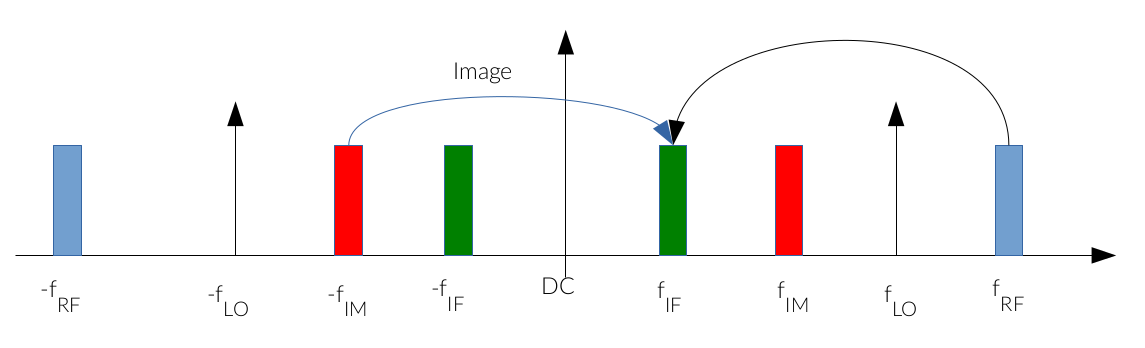

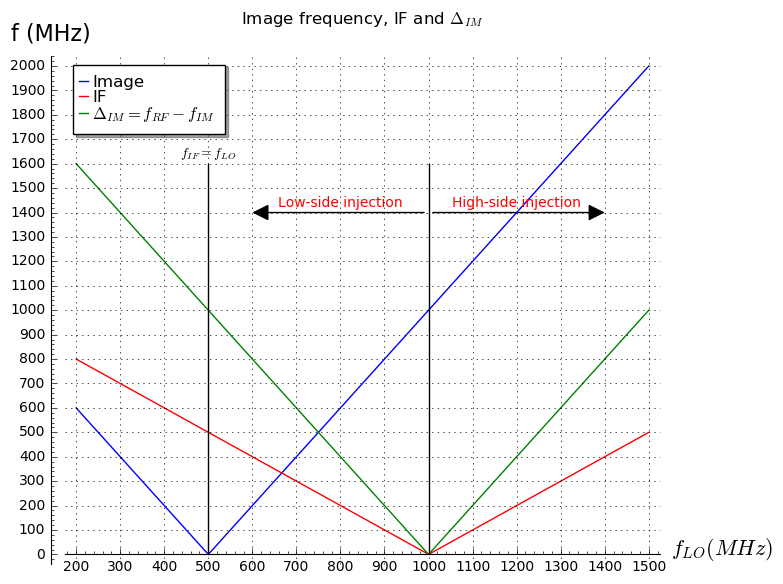

In [7]:
# The RF frequency is fixed and we have to find a suitable IF and LO frequencies
f_RF = 1000; #MHz
var('f_LO')
f_LO_min = 200; #MHz
f_LO_max = 1500; #MHz
def f_IM(f_RF, f_LO):
    return abs(2*f_LO-f_RF);

def f_IF(f_RF, f_LO):
    return abs(f_RF-f_LO);

image = plot(f_IM(f_RF=f_RF, f_LO=f_LO), (f_LO, f_LO_min, f_LO_max), color='blue', legend_label='Image')
IF = plot(f_IF(f_RF=f_RF, f_LO=f_LO), (f_LO, f_LO_min, f_LO_max), color='red', legend_label='IF')
delta = plot(abs(2*f_IF(f_RF=f_RF, f_LO=f_LO)), (f_LO, f_LO_min, f_LO_max), color='green', legend_label='$\Delta_{IM} = f_{RF} - f_{IM}$')

line_IF_LO= line([(f_RF/2, 0), (f_RF/2, 2*(f_RF-f_LO_min))], color='black')
low_high_injection_line= line([(f_RF, 0), (f_RF, 2*(f_RF-f_LO_min))], color='black')

high_side_injection_line = arrow((f_RF + 10, 1.75*(f_RF-f_LO_min)), (f_RF + 400, 1.75*(f_RF-f_LO_min)), color='black', width=1)
high_text = "High-side injection"
high_side_injection_text = text(high_text, (f_RF + 200, 1.75*(f_RF-f_LO_min)+ 40), color = 'red')

low_side_injection_line = arrow((f_RF - 10, 1.75*(f_RF-f_LO_min)), (f_RF - 400, 1.75*(f_RF-f_LO_min)), color='black', width=1)
low_text = "Low-side injection"
low_side_injection_text = text(low_text, (f_RF - 200, 1.75*(f_RF-f_LO_min)+40), color = 'red')

note = text("$f_{IF} = f_{LO}$", (f_RF/2, 2*(f_RF-f_LO_min)+ 40), color = 'black')

P = image + IF + delta +low_high_injection_line + line_IF_LO;
P = P + high_side_injection_line + high_side_injection_text;
P = P + low_side_injection_line + low_side_injection_text + note;

title_text = "Image frequency, IF and $\Delta_{IM}$"
show(P,  axes_labels=['$f_{LO} (MHz)$', 'f (MHz)'], gridlines='Minor', ticks=[100,100], xmin = f_LO_min, xmax=f_LO_max, title=title_text)


Secondary image problem
---

In [23]:
f_IF1 = 200; #MHz
f_IF2 = 10;  #MHz
f_RF = 800;  #MHz

f_LO1 = f_RF - f_IF1; # 1st LO frequency
f_LO2 = f_IF1 - f_IF2; #2nd LO frequency

fIM2_1 = 2*f_LO2 + 2*f_LO1 - f_RF
fIM2_2 = -2*f_LO2+f_RF

print("fIM2_1 = " + str(fIM2_1) + " MHz")
print("fIM2_2 = " + str(fIM2_2) + " MHz")

fIM2_1 = 780 MHz
fIM2_2 = 420 MHz


In [24]:
print("At the first downconversion:")
fIM2_1_IF1 = fIM2_1 - f_LO1;
fIM2_2_IF1 = fIM2_2 - f_LO1;
print("fIM2_1 -> fIM2_1(IF1) = fIM2_1 - f_LO1 = " + str(fIM2_1) + " - " + str(f_LO1) + " = " + str(fIM2_1_IF1) + " MHz" )
print("fIM2_2 -> fIM2_2(IF1) = fIM2_2 - f_LO1 = " + str(fIM2_2) + " - " + str(f_LO1) + " = " + str(fIM2_2_IF1) + " MHz" )

At the first downconversion:
fIM2_1 -> fIM2_1(IF1) = fIM2_1 - f_LO1 = 780 - 600 = 180 MHz
fIM2_2 -> fIM2_2(IF1) = fIM2_2 - f_LO1 = 420 - 600 = -180 MHz


In [26]:
print("At the second downconversion:")
fIM2_1_IF2 = fIM2_1_IF1 - f_LO2;
fIM2_2_IF2 = fIM2_2_IF1 + f_LO2;
print("fIM2_1(IF1) -> fIM2_1(IF2) = fIM2_1(IF1) - f_LO2 = " + str(fIM2_1_IF1) + " - " + str(f_LO2) + " = " + str(fIM2_1_IF2) + " MHz" )
print("fIM2_2(IF1) -> fIM2_2(IF2) = fIM2_2(IF1) - f_LO2 = " + str(fIM2_2_IF1) + " - " + str(f_LO2) + " = " + str(fIM2_2_IF2) + " MHz" )

At the second downconversion:
fIM2_1(IF1) -> fIM2_1(IF2) = fIM2_1(IF1) - f_LO2 = 180 - 190 = -10 MHz
fIM2_2(IF1) -> fIM2_2(IF2) = fIM2_2(IF1) - f_LO2 = -180 - 190 = 10 MHz


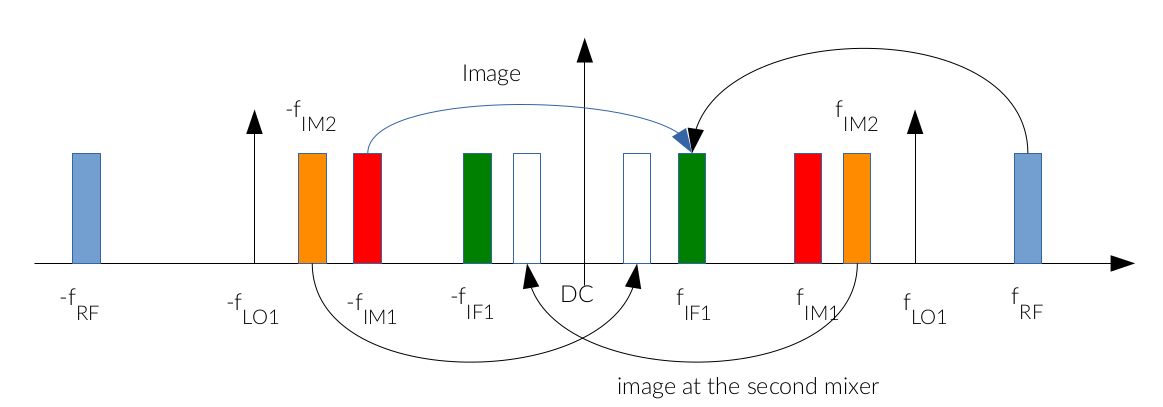

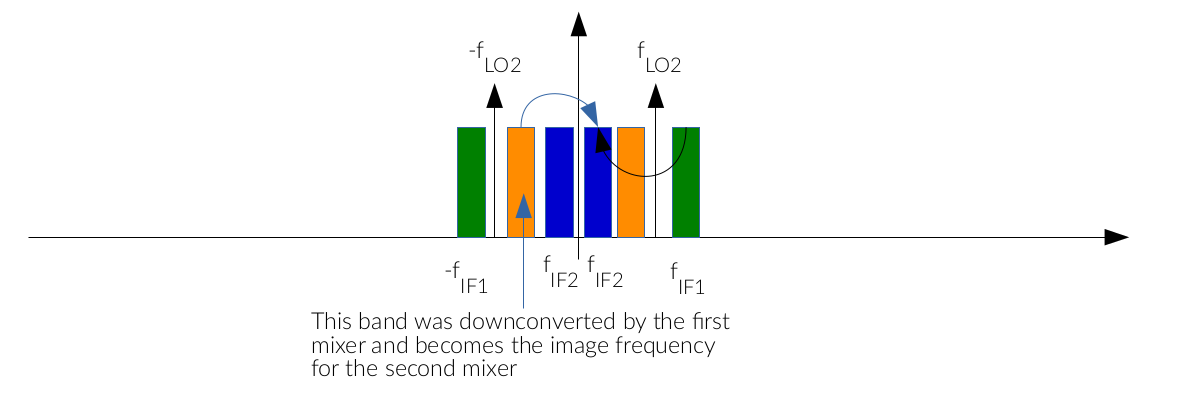